Homework 3

Machine Learning

Caleb Malinowski

RIN: 662052559

Question 1

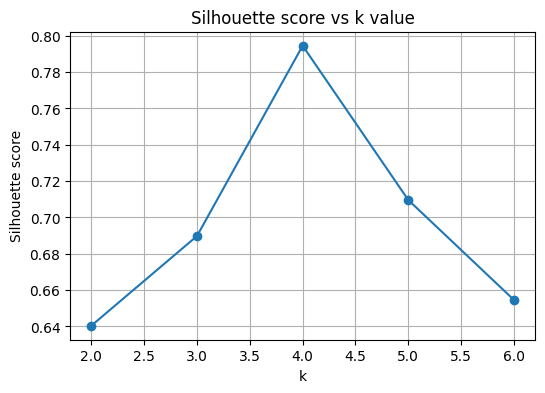

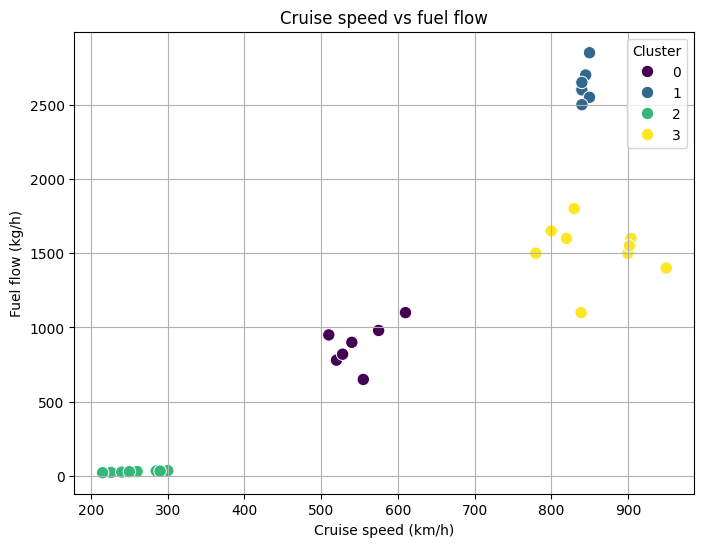

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# load the data
df = pd.read_csv("aircraft_performance.csv")
X = df[['Speed_kmh', 'FuelFlow_kgph']]

# standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# initialize the range of k values
silhouette_scores = []
K = range(2, 7)

# loop over k values
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    silhouette_scores.append(score)

# plotting
plt.figure(figsize=(6, 4))
plt.plot(K, silhouette_scores, marker='o')
plt.xlabel('k')
plt.ylabel('Silhouette score')
plt.title('Silhouette score vs k value')
plt.grid(True)
plt.show()

# choose k = 4 based on previous plot for reasonable k
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df, x='Speed_kmh', y='FuelFlow_kgph',
    hue='Cluster', palette='viridis', s=80
)
plt.xlabel('Cruise speed (km/h)')
plt.ylabel('Fuel flow (kg/h)')
plt.title('Cruise speed vs fuel flow')
plt.legend(title='Cluster')
plt.grid(True)



Cluster 2 has a slow cruise speed and a slow fuel flow. This corresponds to a general aviation aircraft, such as a boat plane.

Cluster 0 has moderate cruise speed and moderate fuel flow. This corresponds to a typical commercial aircraft engine such as a turbo fan.

Cluster 3 has a high cruise speed and a moderate fuel flow. This corresponds to a commercial jet engine such as a turbo prop.

Cluster 1 has a high cruise speed and high fuel flow. This corresponds most likely to a high performance jet engine, such as military applications.

Question 2

/tmp/ipython-input-2527052764.py:21: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return float((1.0/(2*m)) * np.dot((h(w,X)-y).T,(h(w,X)-y)))


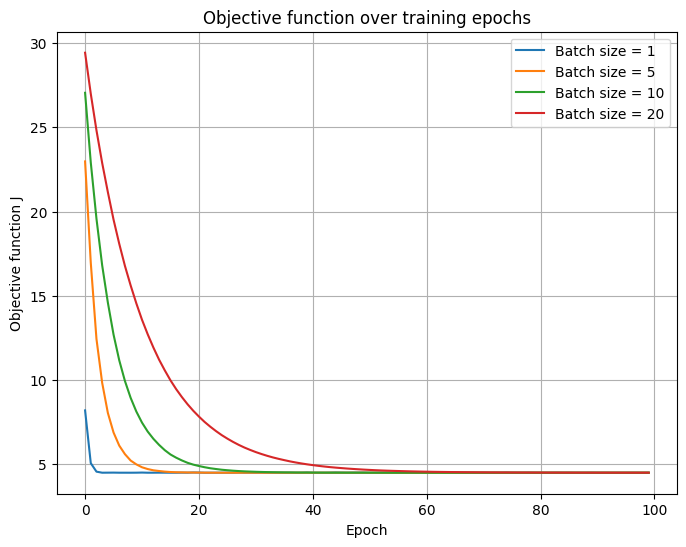

Predicted house price for population 160000: $150976.58


In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# load data
df = pd.read_csv("housing_prices.txt", sep=",", names=["Population", "Price"])
X_raw = df["Population"].values.reshape(-1, 1)
y = df["Price"].values.reshape(-1, 1)
X_mean, X_std = np.mean(X_raw), np.std(X_raw)
X_norm = (X_raw - X_mean) / X_std

# bias term
m = len(y)
X = np.c_[np.ones((m, 1)), X_norm]

# functions from lecture notes
def h(w, X):
    return np.dot(X, w)

def mse(w, X, y):
    return float((1.0/(2*m)) * np.dot((h(w,X)-y).T,(h(w,X)-y)))

def gradient_descend(X, y, w_start, alpha=0.01, n_epochs=200, batch_size=5):
    m = len(y)
    w = np.copy(w_start)
    J_values = []

    for epoch in range(n_epochs):
        indices = np.random.permutation(m)
        X_shuffled = X[indices]
        y_shuffled = y[indices]

        for i in range(0, m, batch_size):
            X_batch = X_shuffled[i:i+batch_size]
            y_batch = y_shuffled[i:i+batch_size]

            gradient = (1.0 / len(X_batch)) * X_batch.T.dot(h(w, X_batch) - y_batch)
            w -= alpha * gradient

        J_values.append(mse(w, X, y))

    return w, J_values

def predict(xval, w):
    x_norm = (xval - X_mean) / X_std
    return w[0] + w[1] * x_norm

# params
batch_sizes = [1, 5, 10, 20]
alpha = 0.01
n_epochs = 100
w_start = np.zeros((X.shape[1], 1))

# plot
plt.figure(figsize=(8,6))
for batch_size in batch_sizes:
    w, J_values = gradient_descend(X, y, w_start, alpha, n_epochs, batch_size)
    plt.plot(range(len(J_values)), J_values, label=f"Batch size = {batch_size}")

plt.xlabel('Epoch')
plt.ylabel('Objective function J')
plt.title('Objective function over training epochs')
plt.legend()
plt.grid(True)
plt.show()

# prediction
population = 16
predicted_price = predict(population, w)
print(f"Predicted house price for population {population*10000:.0f}: ${predicted_price[0] * 10000:.2f}")


When the batch size is one, the cost function has lots of noise and fluctuations, however, as shown on the plot, the convergence is quicker but less stable.

Question 3

              precision    recall  f1-score   support

   malignant       0.96      0.84      0.90        64
      benign       0.91      0.98      0.95       107

    accuracy                           0.93       171
   macro avg       0.94      0.91      0.92       171
weighted avg       0.93      0.93      0.93       171



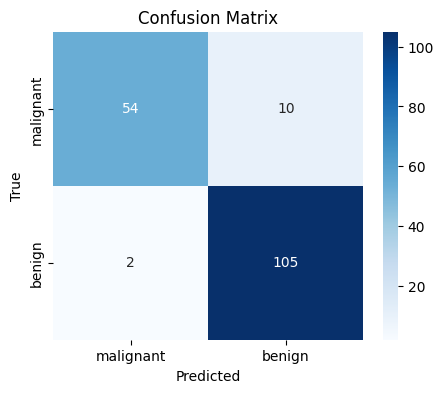

In [66]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import (accuracy_score, precision_score,recall_score,f1_score, confusion_matrix, classification_report)
import matplotlib.pyplot as plt
import seaborn as sns


# load data from scikit
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name='target')

# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# logistic regression
log_reg = LogisticRegression(max_iter=5000, solver='liblinear')

# find 2 best features
rfe = RFE(log_reg, n_features_to_select=2)
rfe.fit(X_train, y_train)
best_features = X.columns[rfe.support_]

# model params
X_train_best = X_train[best_features]
X_test_best = X_test[best_features]
model = LogisticRegression(max_iter=5000, solver='liblinear')
model.fit(X_train_best, y_train)
y_pred = model.predict(X_test_best)

# classification metrics
print(classification_report(y_test, y_pred, target_names=data.target_names))

# confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d',cmap='Blues',xticklabels=data.target_names, yticklabels=data.target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


Question 4

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


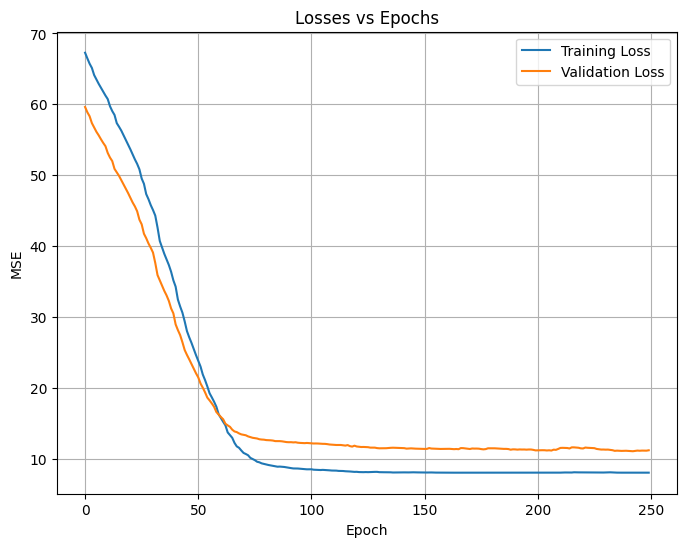

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
Predicted house price for population 165000: $163811.89
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
RMSE: 3.3516


In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# load data
df = pd.read_csv("housing_prices.txt", sep=",", names=["Population", "Price"])
X = df[["Population"]].values
y = df["Price"].values

# split data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

# standardize
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# model params
model = tf.keras.Sequential([tf.keras.layers.Dense(2, activation='relu', input_shape=(1,)), tf.keras.layers.Dense(1) ])
learning_rate = 0.001
optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])
n_epochs = 250

# prediction
pred = model.fit(X_train_scaled, y_train, validation_data=(X_val_scaled, y_val),epochs=n_epochs, verbose=0)

# plot
plt.figure(figsize=(8,6))
plt.plot(pred.history['loss'], label='Training Loss')
plt.plot(pred.history['val_loss'], label='Validation Loss')
plt.title('Losses vs Epochs')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()
plt.grid(True)
plt.show()

# prediction on population
population = 16.5
population_scaled = scaler.transform([[population]])
predicted_price = model.predict(population_scaled)[0][0]
print(f"Predicted house price for population {population*10000:.0f}: ${predicted_price*10000:.2f}")

# RMSE
y_pred_val = model.predict(X_val_scaled).flatten()
mse_val = mean_squared_error(y_val, y_pred_val)
rmse_val = np.sqrt(mse_val)
print(f"RMSE: {rmse_val:.4f}")











































The training losses converge to a slightly lower MSE when compared to the validation losses. In the current state, the number of epochs for convergence to the minimum MSE value occurs around 80 epochs. The average MSE between the two losses is 10 corresponding to a RMSE of 3.35. When the learning rate was increased, more fluctuations and noise was present in the data, so it was reduced to 0.001.